## Cost Efftive RAG with Prompt Compression using LLM Lingua

When working with Generative AI, challenges arise when utilizing language models such as GPT-3.5, characterized by token limitations. This limitation can result in a loss of context after a few questions, shifting us towards larger models like GPT-4 with extended token capacities (128K). However, this solution comes with its own set of issues, including increased costs and a model bias towards prioritizing the beginning and end of instructions, potentially neglecting essential details in the middle.

![image.png](Images/compress.png)

<b>Current Problems</b>
- Token Limitations: GPT-3's constraints on tokens limit the context available for processing.
Costs of Larger Models: Transitioning to GPT-4 incurs higher costs without necessarily addressing contextual challenges.
- Contextual Oversight: Larger models may overlook crucial instructions in the middle of conversations due to their focus on the extremities.
- Contextual Oversight: Larger models may overlook crucial instructions in the middle of conversations due to their focus on the extremities.

<b>LLMLingua can help!</b>
LLMlingua Compression: Using LLMlingua, a package designed for efficient language model compression, aims to mitigate token limitations and enhance contextual understanding. I performs compression in two stages
- Coarse grain compression
    - reordering the documents by prioritizing critical information.
- Fine-grained compression
    - removing reduncy at token level from the documents itself

<b>Impact</b>
- Enhanced Context: LLMlingua's compression capabilities ensure that essential contextual information is retained within the model's processing limitations.
- Cost Efficiency: By addressing the drawbacks of larger models, LLMlingua aims to provide a cost-effective solution without compromising on performance.


Papers: https://arxiv.org/abs/2310.06839
https://aclanthology.org/2023.emnlp-main.825

Notebook:
- <i>Author: <b>Sarmad Afzal</b></i>
- <i>Linkedin: https://www.linkedin.com/in/sarmadafzal/</i>
- <i>Github: https://github.com/sarmadafzalj</i>
- <i>Youtube: https://www.youtube.com/@sarmadafzalj</i>

In [3]:
# !pip install llmlingua==0.1.5
# !pip install streamlit==1.28.2
# !pip install langchain==0.0.336
# !pip install openai==1.2.0
# !pip install tiktoken==0.4.0
# !pip install PyPDF2==3.0.1
# !pip install accelerate==0.26.1
# !pip install optimum==1.16.1
# !pip install auto-gptq

In [23]:
#importing necessary packages
from llmlingua import PromptCompressor
from openai import OpenAI
import openai
import PyPDF2
import os
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the pdf file

In [6]:
#defining function to read text from pdf
def read_pdf(file_path):
    # Open the PDF file in binary mode
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)
        content = ""
        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            content += page.extract_text()
    return content

#reading text from pdf
content = read_pdf("Data/pdf995.pdf")
content[:200]

' \n \n \nThe pdf995 suite of products - Pdf995, PdfEdit995, and Signature995 - is a complete solution for your document publishing needs. It \nprovides ease of use, flexibility in format, and industry-sta'

##### We will put the content into a prompt template (system prompt)

In [7]:
template = f"""You are an QA bot. Please use the context below to answer the questions.
context: {content}
"""

##### Using GPT-4 Turbo from OpenAI as LLM which charged at $0.04 for 1K tokens
- A) Without Compression
- B) With Compression

##### <b>Without Compression</b>

In [26]:
client = OpenAI(api_key="")

completion = client.chat.completions.create(
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": template},
    {"role": "user", "content": "What is the mission statement of VRML?"},
  ]
)

In [27]:
response = completion.choices[0].message.content
completion_token = completion.usage.completion_tokens
prompt_token = completion.usage.prompt_tokens
total_tokens = completion.usage.total_tokens

In [28]:
print("Response:",response,"\n")
print("Completion Tokens:",completion_token)
print("Prompt Tokens:",prompt_token)
print("Total Tokens:",total_tokens)

Response: The mission statement of VRML (Virtual Reality Modeling Language) is:

VRML is an attempt to place humans at the center of the Internet, ordering its universe to our whims. In order to do that, the most important single element is a standard that defines the particularities of perception. Virtual Reality Modeling Language is that standard, designed to be a universal description language for multi-participant simulations. 

The mission is to develop a standard language for interactive simulations within the World Wide Web which would lead to the perceptualization of internetworks. This means rendering data sensually (in a form that can be sensed) so that it makes sense to humans, allowing for a more human-centered navigation and interaction with the data on the Internet. 

Completion Tokens: 148
Prompt Tokens: 2660
Total Tokens: 2808


#### Results without Compression
<b>Response:</b> The mission statement of VRML (Virtual Reality Modeling Language) as stated in the provided context is as follows:

"VRML is an attempt (how successful, only time and effort will tell) to place humans at the center of the Internet, ordering its universe to our whims. In order to do that, the most important single element is a standard that defines the particularities of perception. Virtual Reality Modeling Language is that standard, designed to be a universal description language for multi-participant simulations."

The mission statement highlights the goal of VRML to serve as a standard language that enables immersive, multi-user virtual experiences on the Internet, prioritizing human interaction and the ability to perceive and interact with virtual environments in a sensual and intuitive way.

<b>Completion Tokens:</b> 147
<b>Prompt Tokens:</b> 2660
<b>Total Tokens:</b> 2807

##### <b>With Compression</b>

In [11]:
llm_lingua = PromptCompressor("TheBloke/Llama-2-7b-Chat-GPTQ", model_config={"revision": "main"})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [12]:
compressed_prompt = llm_lingua.compress_prompt(context=[template], target_token=-1)

#### This is the compressed prompt

In [19]:
new_template = compressed_prompt['compressed_prompt']
new_template

In [20]:
client = OpenAI(api_key="s")

completion = client.chat.completions.create(
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": new_template},
    {"role": "user", "content": "What is the mission statement of VRML?"},
  ]
)

In [24]:
response_compressed = completion.choices[0].message.content
completion_token_compressed = completion.usage.completion_tokens
prompt_token_compressed = completion.usage.prompt_tokens
total_tokens_compressed = completion.usage.total_tokens

In [25]:
print("Response:",response_compressed,"\n")
print("Completion Tokens:",completion_token_compressed)
print("Prompt Tokens:",prompt_token_compressed)
print("Total Tokens:",total_tokens_compressed)

Response: The mission statement of VRML (Virtual Reality Modeling Language) is not explicitly mentioned in the provided text. However, VRML's overall purpose is to create fully functional three-dimensional interactive worlds within the internet that can be viewed with VRML-compatible browsers or viewers. The language aims to enable the representation of interactive 3D objects and worlds on the web, allowing users to navigate through and interact with the content in an immersive way. VRML is designed to work on a variety of platforms and to be integrated with existing web technology, such as HTML. It allows for the creation of complex virtual environments with interactive features, such as animations, hyperlinks, and event-driven behaviors. VRML is a standard for describing interactive 3D content and experiences on the internet, capturing the spatial, visual, and interactive aspects of a virtual world in a format that can be shared and experienced by users worldwide. 

Completion Tokens

#### Results with Compression
<b>Response:</b> The mission statement of VRML (Virtual Reality Modeling Language) is not explicitly mentioned in the provided text. However, VRML's overall purpose is to create fully functional three-dimensional interactive worlds within the internet that can be viewed with VRML-compatible browsers or viewers. The language aims to enable the representation of interactive 3D objects and worlds on the web, allowing users to navigate through and interact with the content in an immersive way. VRML is designed to work on a variety of platforms and to be integrated with existing web technology, such as HTML. It allows for the creation of complex virtual environments with interactive features, such as animations, hyperlinks, and event-driven behaviors. VRML is a standard for describing interactive 3D content and experiences on the internet, capturing the spatial, visual, and interactive aspects of a virtual world in a format that can be shared and experienced by users worldwide.

<b>Completion Tokens:</b> 179
<b>Prompt Tokens:</b> 1200
<b>Total Tokens:</b> 1379

#### For GPT-4 Turbo pricing is as below
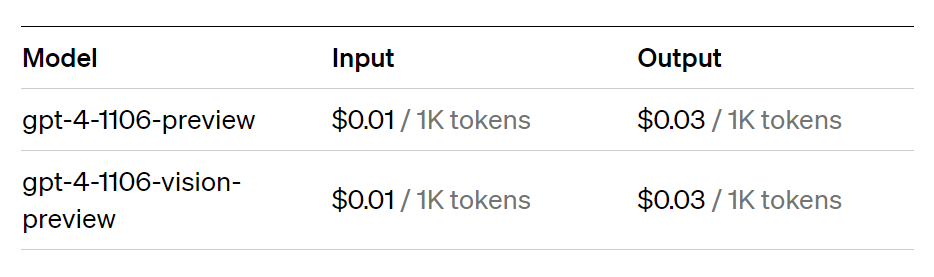

In [39]:
price_without_comp = (148/1000)*0.03 + (2660/1000)*0.01
price_with_comp = (179/1000)*0.03 + (1200/1000)*0.01
per = (price_without_comp-price_with_comp) / price_without_comp
print("Saving: ",per*100,"%")



Saving:  44.039948453608254 %


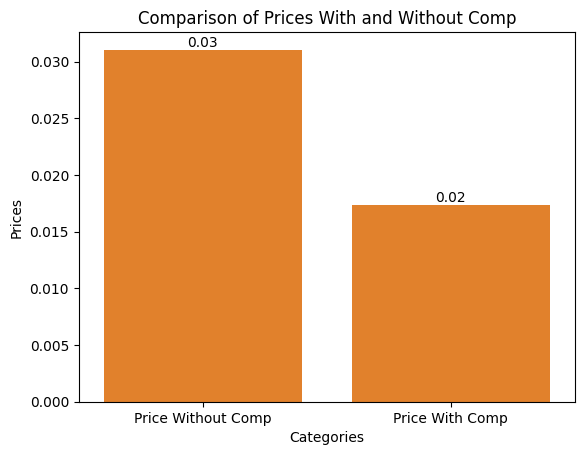

In [33]:
categories = ['Price Without Comp', 'Price With Comp']
prices = [price_without_comp, price_with_comp]
ax = sns.barplot(x=categories, y=prices)
sns.barplot(x=categories, y=prices)
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.title('Comparison of Prices With and Without Comp')
for i, value in enumerate(prices):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()


### Hence we are saving almost half of the money!!! and the responses have the same context.